# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.linear_model import Perceptron

# Execute

## Step 1

- Considerando duas classes equiprováveis (para os exercícios de 3 a 6): 
- C1 🡪 gaussiana bidimensional com média [0 0] e matriz de covariância [1 0; 0 1] 
- C2 🡪 gaussiana bidimensional com média [5 5] e matriz de covariância [1 0; 0 1] 

In [2]:
mean_C1 = np.array([0, 0])            # Mean values for C1
zeta_C1 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C1
mean_C2 = np.array([5, 5])            # Mean values for C2
zeta_C2 = np.array([[1, 0], [0, 1]])  # Covariance matrix for C2
np.random.seed(0) 
samples_C1 = np.random.multivariate_normal(mean_C1, zeta_C1, 600)
samples_C2 = np.random.multivariate_normal(mean_C2, zeta_C2, 600)
np.savetxt('data/samples_C1.txt', samples_C1, delimiter=',')
np.savetxt('data/samples_C2.txt', samples_C2, delimiter=',')

## Step 2
- Separe o conjunto de dados de treino e teste, com 300 eventos de cada classe em cada conjunto, salve estes bancos e não embaralhe mais os dados.

In [3]:
# Get the first 300 feature to train set, and the last 300 to test set for the C1 and C2 class
train_c1, test_c1 = samples_C1[:300], samples_C1[300:]
train_c2, test_c2 = samples_C2[:300], samples_C2[300:]

## Step 3
- Obtenha a função discriminante de Bayes e plote a superfície de separação juntamente com 
300 eventos de cada classe do conjunto de teste. 


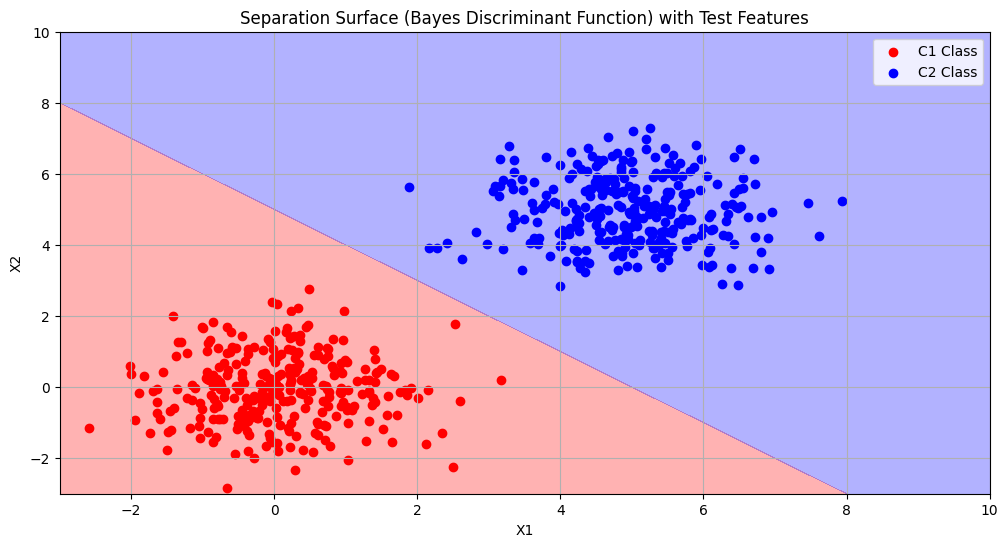

In [10]:
def gaussian_pdf(x, mean, cov):
    k = len(cov) 

    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    
    norm_const = 1 / ((2 * np.pi) ** (k / 2) * det_cov ** 0.5)
    
    x_diff = x - mean

    result_exponent = np.array([np.exp(-0.5 * np.dot(x.T, np.dot(inv_cov, x))) for x in x_diff])
    return norm_const * result_exponent

def bayes_discriminant(x, mean_C1, cov_C1, mean_C2, cov_C2):
    return gaussian_pdf(x, mean_C2, cov_C2) - gaussian_pdf(x, mean_C1, cov_C1)

x_min, x_max = -3, 10
y_min, y_max = -3, 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

discriminant_values_bayes = bayes_discriminant(grid, mean_C1, zeta_C1, mean_C2, zeta_C2)
discriminant_values_bayes = discriminant_values_bayes.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, discriminant_values_bayes, levels=[-np.inf, 0, np.inf], alpha=0.3, colors=['red', 'blue'])
plt.scatter(test_c1[:, 0], test_c1[:, 1], color='red', label='C1 Class')
plt.scatter(test_c2[:, 0], test_c2[:, 1], color='blue', label='C2 Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Separation Surface (Bayes Discriminant Function) with Test Features')
plt.grid(True)
plt.show()

## Step 4

-  Utilizando agora apenas 50 eventos de cada classe do conjunto de treinamento, projete novamente o classificador Bayesiano. Anote o resultado e plote a reta de separação, comparando com o classificador de Bayes do exercício anterior (a reta de separação deve ser plotada considerando todos os eventos de teste).

/tmp/ipykernel_36817/3977240643.py:12: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, discriminant_values_bayes, levels=[-np.inf, 0, np.inf], alpha=0.3, colors=['red', 'blue'], label="Superfície com 300 eventos")
/tmp/ipykernel_36817/3977240643.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, discriminant_values_bayes_train, levels=[0], colors='green', linestyles='-', linewidths=2, label="Superfície com 50 eventos")


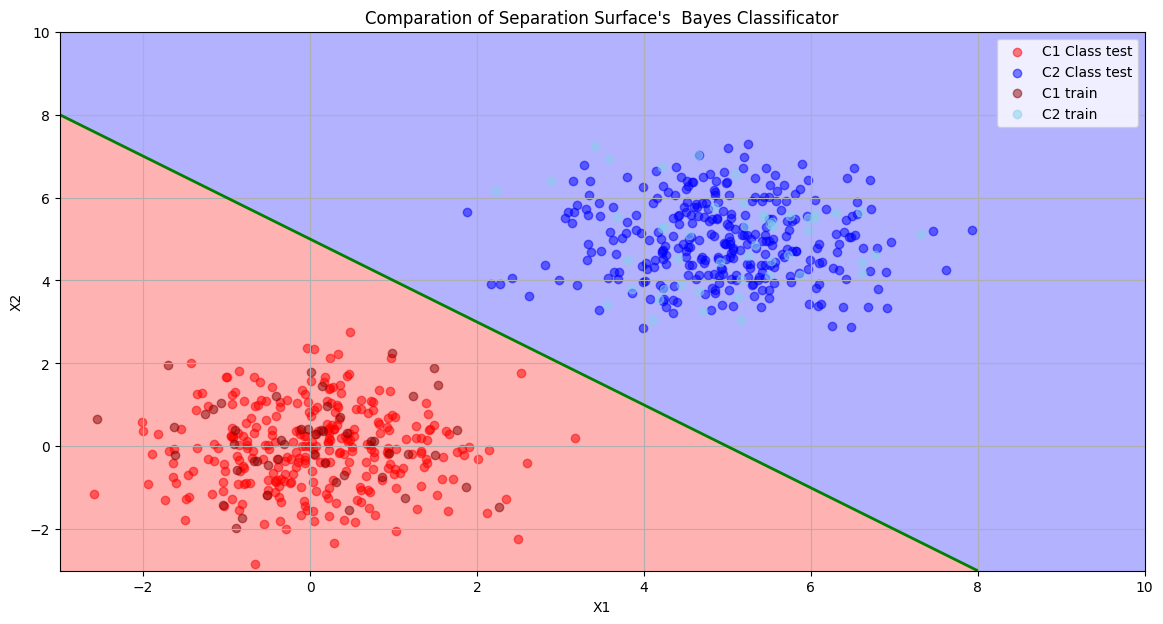

In [32]:
x, y = np.meshgrid(np.linspace(-3, 10, 500), np.linspace(-3, 10, 500))
grid = np.c_[x.ravel(), y.ravel()]

train_C1_small = train_c1[:50]
train_C2_small = train_c2[:50]

discriminant_values_bayes_train = bayes_discriminant(grid, mean_C1, zeta_C1, mean_C2, zeta_C2)
discriminant_values_bayes_train = discriminant_values_bayes_train.reshape(x.shape)

plt.figure(figsize=(14, 7))
plt.contourf(xx, yy, discriminant_values_bayes, levels=[-np.inf, 0, np.inf], alpha=0.3, colors=['red', 'blue'], label="Superfície com 300 eventos")
plt.contour(x, y, discriminant_values_bayes_train, levels=[0], colors='green', linestyles='-', linewidths=2, label="Superfície com 50 eventos")
plt.scatter(test_c1[:, 0], test_c1[:, 1], c='red', label='C1 Class test', alpha=0.5)
plt.scatter(test_c2[:, 0], test_c2[:, 1], c='blue', label='C2 Class test', alpha=0.5)
plt.scatter(train_C1_small[:, 0], train_C1_small[:, 1], c='darkred', label='C1 train', alpha=0.5)
plt.scatter(train_C2_small[:, 0], train_C2_small[:, 1], c='skyblue', label='C2 train', alpha=0.5)
plt.title("Comparation of Separation Surface's  Bayes Classificator")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()

## Step 5
- Discuta como o número de dados do conjunto de treino pode impactar no projeto do classificador Bayesiano.  

- Resposta: Conforme vimos no desenvolvimento da atividade, o Classificador Bayesiano depende apenas da média e do desvio padrão do conjunto de dados. Dessa forma, a quantidade em si dos dados não influenciará desde que sigam a mesma média e desvio padrão.